
# <span style="color:rgb(213,80,0)">Tutorial 5 - Simulate CC-CV Cycling</span>
## Introduction

In this tutorial, we will use a P2D model to simulate CC-CV cycling. After completing this tutorial, you should have a working knowledge of:

-  How to define and modify cycling protocols in BattMo

We'll use the same model from Tutorial 1.


In [1]:
jsonstruct = parseBattmoJson('Examples/jsondatafiles/sample_input.json');


Parameters are defined in the JSON parameter file and parsed into the MATLAB structure. Once the JSON file has been read into MATLAB as a jsonstruct, its properties can be modified programmatically.

## Explore the Control Definition

Let's begin by reviewing the control protocol in BattMo, with the command:


In [2]:
disp(jsonstruct.Control)

         controlPolicy: 'CCDischarge'
                 CRate: 1
    lowerCutoffVoltage: 2.4000
    upperCutoffVoltage: 4.1000
             dIdtLimit: 0.0100
             dEdtLimit: 0.0100
            rampupTime: 0.1000


We see that the default control protocol is set to a constant current (galvanostatic) discharge. To change to a CC-CV cycling protocol, we can use the command:


In [3]:
cccv_control_protocol = parseBattmoJson('cccv_control.json');
jsonstruct_modified = mergeJsonStructs({cccv_control_protocol, jsonstruct});

parameter Control.controlPolicy is assigned twice with different values. we use the value from first jsonstruct.
parameter Control.lowerCutoffVoltage is assigned twice with different values. we use the value from first jsonstruct.


Now we can explore the modified control protocol definition with the command:


In [4]:
disp(jsonstruct_modified.Control)

         controlPolicy: 'CCCV'
        initialControl: 'discharging'
                 CRate: 1
    lowerCutoffVoltage: 2.6000
    upperCutoffVoltage: 4.1000
             dIdtLimit: 0.0100
             dEdtLimit: 0.0100
            rampupTime: 0.1000


Let's run the simulation and plot the cell voltage curve.


In [5]:
% run the simulation
output = runBatteryJson(jsonstruct);

Solving timestep 01/45:                      -> 3 Seconds, 937 Milliseconds
Solving timestep 02/45: 3 Seconds, 937 Milliseconds -> 7 Seconds, 875 Milliseconds
Solving timestep 03/45: 7 Seconds, 875 Milliseconds -> 15 Seconds, 750 Milliseconds
Solving timestep 04/45: 15 Seconds, 750 Milliseconds -> 31 Seconds, 500 Milliseconds
Solving timestep 05/45: 31 Seconds, 500 Milliseconds -> 63 Seconds
Solving timestep 06/45: 63 Seconds           -> 126 Seconds
Solving timestep 07/45: 126 Seconds          -> 252 Seconds
Solving timestep 08/45: 252 Seconds          -> 378 Seconds
Solving timestep 09/45: 378 Seconds          -> 504 Seconds
Solving timestep 10/45: 504 Seconds          -> 630 Seconds
Solving timestep 11/45: 630 Seconds          -> 756 Seconds
Solving timestep 12/45: 756 Seconds          -> 882 Seconds
Solving timestep 13/45: 882 Seconds          -> 1008 Seconds
Solving timestep 14/45: 1008 Seconds         -> 1134 Seconds
Solving timestep 15/45: 1134 Seconds         -> 1260 Seconds
So


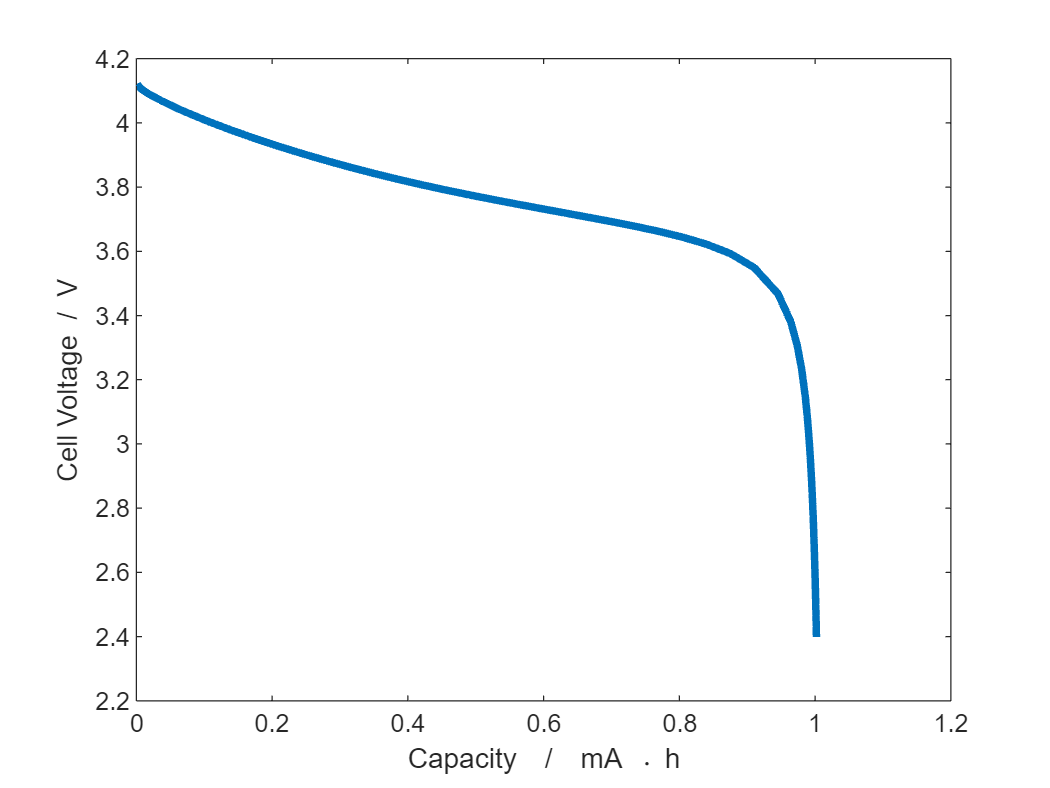

In [6]:

% get the states
states = output.states;

% extract the time and voltage quantities
time = cellfun(@(state) state.time, states);
voltage = cellfun(@(state) state.('Control').E, states);
current = cellfun(@(state) state.('Control').I, states);

% calculate the capacity
capacity = time .* current;

% plot the discharge curve in the figure
plot(time/hour, voltage, '-', 'linewidth', 3)

% add plot annotations
xlabel('Capacity  /  mA \cdot h')
ylabel('Cell Voltage  /  V')

## Summary

In this tutorial, we explored how to modify material parameters in BattMo.

